# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
# Create two new dataframes

# north_df = pd.read_csv("NorthCallCenter.csv")
# south_df = pd.read_csv("SouthCallCenter.csv")
#if you want to delete the unnamed column and clean it up from the beginning- pd.read_csv("___.csv", , index_col=[0])

north_df = pd.read_csv("NorthCallCenter.csv", index_col=[0])
south_df = pd.read_csv("SouthCallCenter.csv", index_col=[0])

In [2]:
north_df.head(2)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


In [3]:
print(north_df.shape)

(245, 14)


In [4]:
print(south_df.shape)

(314, 14)


In [5]:
south_df.head(5)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [6]:
#Code Used:
# north_df.value_counts("Rep ID")
north_rep_count = north_df["Rep ID"].nunique()
north_rep_count

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [7]:
#Code Used:
# south_df.value_counts("Rep ID")
south_rep_count = south_df["Rep ID"].nunique()
south_rep_count

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [8]:
#Code Used:
print("North Avg Busy Minutes:", north_df["Busy Minutes"].mean().round(2))
print("North Avg Not Ready Minutes:", north_df["Not Ready Minutes"].mean().round(2))
print("North Avg Incoming Wait Time:", north_df["Incoming Wait Time"].mean().round(2))
print("North Avg During Call Wait Time:", north_df["During Call Wait Time"].mean().round(2))

# north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean().round(2)

North Avg Busy Minutes: 9.99
North Avg Not Ready Minutes: 1.91
North Avg Incoming Wait Time: 3.05
North Avg During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
#Code Used:
print("South Avg Busy Minutes:", south_df["Busy Minutes"].mean().round(2))
print("South Avg Not Ready Minutes:", south_df["Not Ready Minutes"].mean().round(2))
print("South Avg Incoming Wait Time:", south_df["Incoming Wait Time"].mean().round(2))
print("South Avg During Call Wait Time:", south_df["During Call Wait Time"].mean().round(2))

South Avg Busy Minutes: 10.05
South Avg Not Ready Minutes: 1.91
South Avg Incoming Wait Time: 3.0
South Avg During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [10]:
# Code Used:
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [11]:
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [12]:
Total_calls_per_block = north_df["Time Block"].value_counts() + south_df["Time Block"].value_counts()
Total_calls_per_block

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11

- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

>NORTH:missing values in incoming wait time- 66.53%

>SOUTH:missing values in incoming wait time- 59.87%

>Even though both of these are a significant amout of missing information, it missing could potentially have meaning. Maybe there was a 0 min wait time, thus it was not recorded. I will leave this column in the data for now. I will also need this information later to analyze their call center efficiency KPI.

In [13]:
# Code Used
# Add Additional Cells as needed.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))
    
    #missing values in incoming wait time- 66.53%

Branch - 0.0%
Call Purpose - 0.0%
Time Block - 0.0%
Incoming or Outgoing - 0.0%
Queue - 0.0%
Rep ID - 0.0%
Sale - 0.0%
Lost Call - 0.0%
Abandoned - 0.0%
Busy Minutes - 0.0%
Not Ready Minutes - 0.0%
Incoming Wait Time - 66.53%
During Call Wait Time - 0.0%
Calls - 0.0%


In [14]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))
    
    #missing values in incoming wait time- 59.87%

Branch - 0.0%
Call Purpose - 0.0%
Time Block - 0.0%
Incoming or Outgoing - 0.0%
Queue - 0.0%
Rep ID - 0.0%
Sale - 0.0%
Lost Call - 0.0%
Abandoned - 0.0%
Busy Minutes - 0.0%
Not Ready Minutes - 0.0%
Incoming Wait Time - 59.87%
During Call Wait Time - 0.0%
Calls - 0.0%


In [15]:
north_df.isna().sum()+south_df.isna().sum()
#this finds the actual count of null values in each column

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
If I want to accuratly be able to compare the conversion rate for sales, then I need to have all "YES"'s calculated together. I used str.strip() to strip the blank space/ whitespace in the "Sale" column. I then recounted the value_counts to be sure it worked.

In [16]:
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [17]:
#Code Used
north_df['Sale'] = north_df['Sale'].str.strip()


In [18]:
north_df["Sale"].value_counts()
#this was to check that the space was stripped

NO     234
YES     11
Name: Sale, dtype: int64

In [19]:
north_df.head(2)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 
After taking out the "Unnamed: 0" because I knew it would be unique, I found the amount of dupplicates for each dataframe. Then analyzed the returned duplicates and found that they are actually not duplicates. I did not remove
NORTH: 2 dupplicates found- actually different- not removed
SOUTH: 3 dupplicates found- actually different- not removed

In [20]:
#Code Used
# Add Additional Cells as needed.
# north_df_dedupped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()

# # there were duplicate rows
# print("north_df shape:", north_df.shape)
# print("north_df_dedupped shape:", north_df_dedupped.shape)
# # df = df_dedupped

# south_df_dedupped = south_df.drop('Unnamed: 0', axis=1).drop_duplicates()

# # there were duplicate rows
# print("south_df shape:", south_df.shape)
# print("south_df_dedupped shape:", south_df_dedupped.shape)


In [21]:
north_dupes = north_df[north_df.duplicated()]
north_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [22]:
south_dupes = south_df[south_df.duplicated()]
south_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 
The unnamed column is not necessary becuase we already have an index shown. I removed that with my dedupped df above.
The column "Calls" seems unneccesary- all values are 1 becuase each call is stored separetely. I chose not to remove this column though so I could use it as a sort key and count with it later in my analysis.

In [23]:
#Code Used
# Add Additional Cells as needed.
# north_df["Calls"].value_counts()

In [24]:
# south_df["Calls"].value_counts()

In [25]:
# north_df = north_df_dedupped.drop('Calls', axis=1)
# south_df = south_df_dedupped.drop('Calls', axis=1)

#chose not to take out Calls so I could count using that column later

In [26]:
north_df.shape

(245, 14)

In [27]:
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [5]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index = True)
df.shape

(559, 14)

In [6]:
df.head(2)
#added to show top of df- hoping it was north's data then will run tail below to be sure that south's data is there

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1


In [7]:
df.tail(2)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
558,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent- 37 Calls
- South Branch = Eric - 35 Calls


In [31]:
# Code Used
# Add Additional Cells as needed.
df_grouped = df.groupby("Rep ID")
# df_grouped["Rep ID"].value_counts()
df_grouped.first().sort_values("Branch")

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,
Joe,North,Product Support,2:00 PM,Incoming,A,NO,0,0,8,1,1.0,3,1
Lilly,North,Product Support,2:00 PM,Incoming,B,NO,0,0,11,2,1.0,3,1
Todd,North,Sales Support,11:00 AM,Incoming,B,NO,0,0,9,3,1.0,3,1
Duke,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Xander,North,Product Support,3:00 PM,Incoming,B,NO,0,0,12,1,2.0,4,1
Brent,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Andy,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Amanda,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Cam,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1


In [32]:
df_grouped.agg("sum")

C:\Users\longs\AppData\Local\Temp\ipykernel_14576\1413511487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped.agg("sum")


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Alice,0,0,199,46,15.0,58,20
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23
Brent,0,1,362,71,17.0,117,37
Cam,1,0,233,46,32.0,66,24
Duke,2,0,292,56,39.0,85,29
Eric,0,0,361,54,47.0,112,35
George,0,0,298,53,41.0,87,29
Helga,0,2,292,58,36.0,95,31


In [33]:
df_grouped.agg({"Calls" : "sum"}).sort_values("Calls", axis = 0, ascending = False, inplace = False)

,Calls
Rep ID,
Brent,37
Eric,35
Randy,33
Sandy,32
Helga,31
Lilly,30
Todd,29
Duke,29
George,29


In [34]:
#Another way to gropu and sort by both branch and calls
df_bybranchrep = df.groupby(['Branch','Rep ID']).sum().sort_values(['Branch','Calls'], ascending=False)
df_bybranchrep

C:\Users\longs\AppData\Local\Temp\ipykernel_14576\569431904.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bybranchrep = df.groupby(['Branch','Rep ID']).sum().sort_values(['Branch','Calls'], ascending=False)


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
South  Eric            0          0           361                 54   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Helga           0          2           292                 58   
       George          0          0           298                 53   
       Kate            0          0           291                 61   
       Karl            1          0           287                 61   
       Josh            3          0           260                 50   
       Susan           2          0           267                 53   
       Sharon          1          1           257                 38   
       Alice           0          0           199                 46   
North  Brent           0          1           362                 71   
       Lilly           0          2           307                 59   
       Duke            2          0           292                 56   
       Todd            1          0           296                 58   
       Joe             0          0           256                 49   
       Cam             1          0           233                 46   
       Xander          1          0           244                 44   
       Amanda          0          1           229                 43   
       Andy            0          3           228                 43   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
South  Eric                  47.0                    112     35  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Helga                 36.0                     95     31  
       George                41.0                     87     29  
       Kate                  37.0                     83     29  
       Karl                  26.0                     85     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
       Sharon                29.0                     77     25  
       Alice                 15.0                     58     20  
North  Brent                 17.0                    117     37  
       Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
       Joe                   36.0                     81     26  
       Cam                   32.0                     66     24  
       Xander                20.0                     68     24  
       Amanda                12.0                     60     23  
       Andy                  36.0                     65     23

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
None of them fall outside of the optimal range. North has the higher abandoned call average.

In [35]:
# Code Used  
df_abandonded_avg = df.agg({"Abandoned" : "sum"})/len(df)*100
df_abandonded_avg.round(2)

Abandoned    1.97
dtype: float64

In [36]:
north_df_abandonded_avg = north_df.agg({"Abandoned" : "sum"})/len(north_df)*100
north_df_abandonded_avg.round(2)

Abandoned    2.86
dtype: float64

In [37]:
south_df_abandonded_avg = south_df.agg({"Abandoned" : "sum"})/len(south_df)*100
south_df_abandonded_avg.round(2)

Abandoned    1.27
dtype: float64

In [38]:
#this also works
# s = south_df.agg({"Abandoned" : "mean"})
# s.round(4)

# s = south_df["Abandoned"].mean()*100
# s.round(2)

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls answered within 2 seconds--> 40.24%
- South Branch = 48 calls answered within 2 seconds--> 38.1%
- Company Wide = 81 calls answered within 2 seconds--> 38.94%

In [16]:
north_num_calls = (north_df["Incoming or Outgoing"] == "Incoming").sum()
north_wait_within2 = (north_df["Incoming Wait Time"] <= 2).sum()
north_average = (north_wait_within2/north_num_calls)*100

print("North number of incoming calls:", north_num_calls)
print("North wait within 2 seconds =", north_wait_within2)
print("North calls answered in under 2 seconds on average:", north_average.round(2))

North number of incoming calls: 82
North wait within 2 seconds = 33
North calls answered in under 2 seconds on average: 40.24


In [42]:
#Another way to count only incoming calls= 126 still
# south_num_calls = (south_df["Incoming or Outgoing"] == "Incoming").sum()
# south_num_calls

In [18]:
south_num_calls = south_df["Incoming Wait Time"].count()
south_wait_within2 = (south_df["Incoming Wait Time"] <= 2).sum()
south_average = (south_wait_within2/south_num_calls)*100
print("South number of incoming calls:", south_num_calls)
print("south wait within 2 seconds =", south_wait_within2)
print("south calls answered in under 2 seconds on average:", south_average.round(2))

South number of incoming calls: 126
south wait within 2 seconds = 48
south calls answered in under 2 seconds on average: 38.1


In [12]:
#For loop that does the same calculation...but it's doing too much

# south_wait2 =0
# for value in south_df["Incoming Wait Time"]:
#     if value <=2:
#         south_wait2 +=1
#     else:
#         south_wait2 += 0
# south_avg = (south_wait2/south_num_calls)*100
# print("south_wait2 =", south_wait2)
# print("South calls answered in under 2 seconds on average:", south_avg.round(2))

In [20]:
df_num_calls = df["Incoming Wait Time"].count()
df_wait_within2 = (df["Incoming Wait Time"] <= 2).sum()
df_average = (df_wait_within2/df_num_calls)*100

print("Total number of incoming calls:", df_num_calls)
print("df wait within 2 seconds =", df_wait_within2)
print("df calls answered in under 2 seconds on average:", df_average.round(2))

Total number of incoming calls: 208
df wait within 2 seconds = 81
df calls answered in under 2 seconds on average: 38.94


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds


In [47]:
# Code Used
north_df["Incoming Wait Time"].describe()

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [48]:
north_df["Incoming Wait Time"].mean().round(2)

3.05

In [49]:
south_df["Incoming Wait Time"].mean().round(2)

3.0

In [50]:
df["Incoming Wait Time"].mean().round(2)

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I chose a vertical bar chart. I thought this would give a good comparison between the different queues and allow a visual that could quickly tell us which queues have the highest abanded call rates. 

Averag Abandonment Rate in Percent Per Queue:

A: 4.17% Queue A has the highest abandonment rate

B: 2.01%

C: 0.72% Queue C has the lowest abandonment rate

D: 1.70%



C:\Users\longs\AppData\Local\Temp\ipykernel_14576\2230781776.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


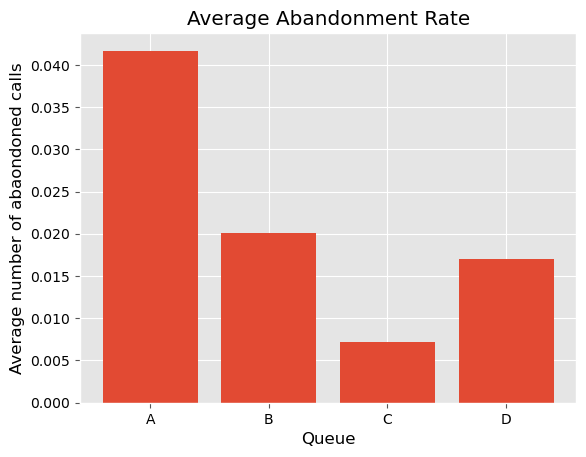

In [90]:
# Create visualization 1 here
# Import any additional libraries needed with alias
# The following were already imported at the beginning
# import matplotlib 
# import matplotlib.pyplot as plt
# import numpy as np


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

# df_tot = pd.DataFrame(df.loc[:, abandonment_rates].sum())
# df_tot.rename(columns = {0:'total'}, inplace = True)

# df_tot.plot(kind = 'bar', legend = False)

style.use('ggplot')
plt.bar(*zip(*abandonment_rates.items()))
plt.title('Average Abandonment Rate',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Average number of abaondoned calls',color = 'black')
plt.savefig('bar_vertical.png')

plt.show()


# print(abandonment_rates) 
#{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar graphs for both to create a visual to quickly compare the rates per rep.

The first visualization with the blue bars shows the Service Level Percent Per Rep. We can quickly see that Brent has the highest percent and is the most efficent representative, while Joe has the lowest percentage and efficiency.

The second visualization with the red bars shows the Average Answer Speed Per Representative a the North Call center. For this we can see that Brent's speed is the lowest (low being good), and the highest/longest speed to answer would be Andy and Joe. 

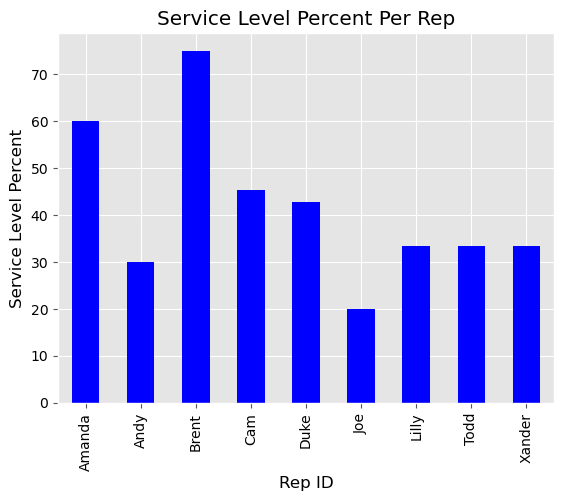

In [91]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level["Service Level %"].plot(kind = 'bar', legend = False, color = 'b')
plt.title('Service Level Percent Per Rep',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Service Level Percent',color = 'black')
plt.savefig('bar_vertical2.png')
plt.show()


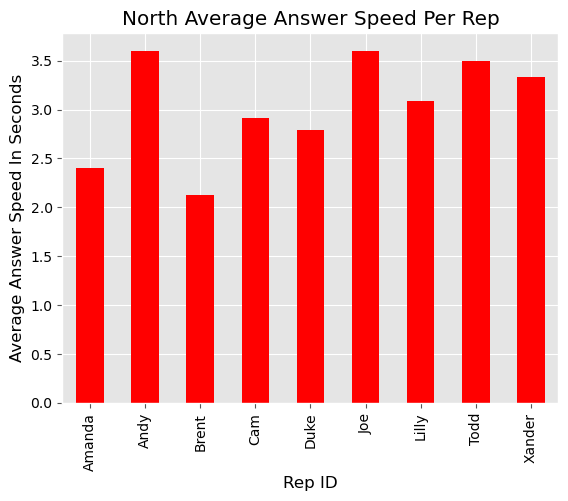

In [127]:
#visual 3
north_plt.plot(x= "Rep ID", y= "Incoming Wait Time", kind = 'bar', legend = False, color = 'r')
plt.title('North Average Answer Speed Per Rep',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Average Answer Speed In Seconds',color = 'black')
plt.savefig('bar_vertical3.png')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
For this I chose a donut graph. This way I could separate the purpose of the call by the direction of the call. I could analyze the count of each as well as compare the distribution. Another good option for this could have been a double bar graph with the x-axis being the call purposes and the double bars representing call direction- outgoing or incoming. 


In [130]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

#in exercise
# year_int10 = list(map(str, (1980, 1990, 2000, 2010, 2013)))
# df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)
# df_group.plot.bar(edgecolor = 'white')


# df_group = pd.DataFrame(df.loc[["complaints", "sales_support", "product_support"], "Incoming or Outgoing"].T)
# df_group = pd.DataFrame(df.loc[["Complaint", "Product Support", "Sales Support"], purpose_group].T)
# df_group = pd.DataFrame(complaints, sales_support, product_support, index = purpose_group["Incoming or Outgoing"]).T
# df_group = pd.DataFrame(purpose_counts, index = call_purpose).T

# df_group = pd.DataFrame({complaints,sales_support,purpose_counts}, index = call_purpose).T
# df_group.plot.bar(edgecolor = 'white')

# purpose_counts.plot(kind = 'bar', legend = True, color = 'r')
# plt.title('Calls per purpose',color = 'black')
# plt.xticks(color = 'black')
# plt.yticks(color = 'black')
# plt.xlabel('Rep ID',color = 'black')
# plt.ylabel('Total number of calls',color = 'black')
# plt.legend(title = 'Call Direction', loc = 'upper right', fontsize = 12, labelcolor = 'b')
# plt.savefig('bar_vertical4.png')
# plt.show()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


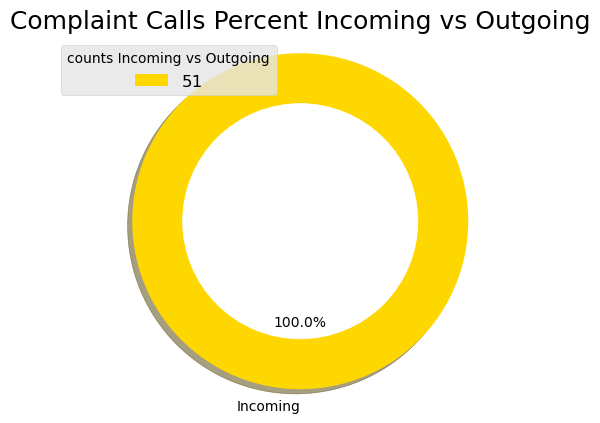

In [140]:
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'lightskyblue']
labels = ["Incoming"]
labels = list(labels)

plt.pie(complaints.values(), labels= labels, autopct = '%1.1f%%', shadow = True, colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(complaints.values(), fontsize = 12, loc = 'upper left', labelcolor= 'black', title = "counts Incoming vs Outgoing")
plt.title('Complaint Calls Percent Incoming vs Outgoing', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut1.png')

plt.show()

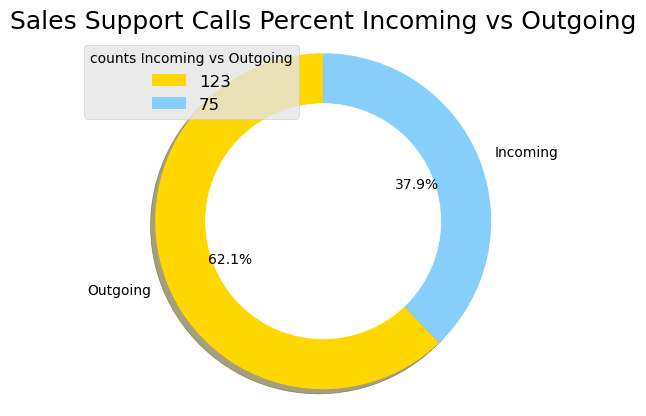

In [145]:
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'lightskyblue']
labels = ["Outgoing", "Incoming"]
labels = list(labels)

plt.pie(sales_support.values(), labels = labels, autopct = '%1.1f%%', shadow = True, colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(sales_support.values(), fontsize = 12, loc = 'upper left', labelcolor= 'black', title = "counts Incoming vs Outgoing")
plt.title('Sales Support Calls Percent Incoming vs Outgoing', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut2.png')

plt.show()

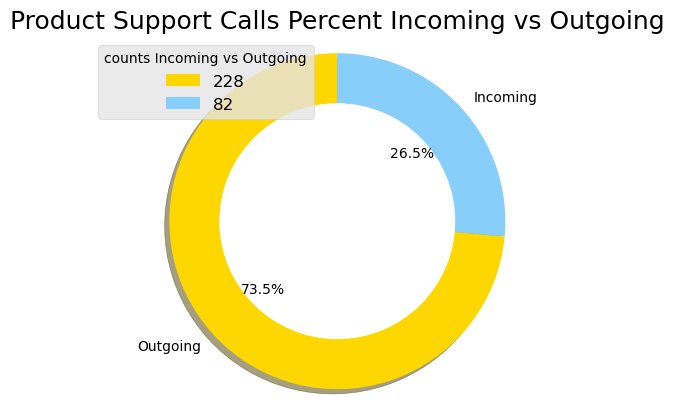

In [144]:
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'lightskyblue']
labels = ["Outgoing", "Incoming"]
labels = list(labels)

plt.pie(product_support.values(), labels = labels, autopct = '%1.1f%%', shadow = True, colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(product_support.values(), fontsize = 12, loc = 'upper left', labelcolor= 'black', title = "counts Incoming vs Outgoing")
plt.title('Product Support Calls Percent Incoming vs Outgoing', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut3.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Based on the data, the south brand is running more efficiently. South has a faster average speed of answer at 3.0 secons. South has a higher average call amount answered within the service level efficiency of within 2 seconds at 38.1% versus North at 40.24%. South Branch also has a lower abandoned call rate at 1.27% versus North's 2.86%. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
South recorded 314 calls for 11 reps which averages out to 28.5 calls per rep. North recorded 245 calls for 9 reps which averages out to 27.2 calls per rep. 
Although south has a high call count and a larger amount of reps, they are working more efficiently. North branch could use the extra help to become more efficient. This company could also consider sending reps from South to help streamline processes used at thier branch to help North branch improve.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: It could be nice to know what the senority of the representatives was. It could be possible that the south branch is running with more experiences reps and thus have become more efficient over time. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: